____________

### **1. Dataset & Preprocessing**

In this section, we are going to load a 2-dimensional  data and preprocess it using the "numpy" package.  

In [4]:
# Load numpy package
import numpy as np
import pandas as pd


Load the pre-generated data provided to you. Using numpy, load the file "dataset.csv" and print its shape. You should see that the data is a numpy array (a matrix) with 500 rows (called **data samples**) and 3 columns. The first two columns are the **features** of the samples and the last column is the **label** of each sample.

In [9]:
# load data using "np.genfromtxt"
data = np.genfromtxt("dataset.csv", delimiter=',',dtype=np.float64)
# data = pd.read_csv("dataset.csv", header=0, names=['x', 'y', 'z'])
# print 5 rows from the data
print(data[:5])
# print its shape
print("Data shape:", data.shape)

[[ 1.75111789 -1.25722467 -1.        ]
 [ 2.47513131  1.7817015   1.        ]
 [ 0.89051961 -1.60740181 -1.        ]
 [ 1.71910455 -1.91091876 -1.        ]
 [ 0.99335187  1.00259882  1.        ]]
Data shape: (500, 3)


Split the data into features and labels and print their shape. Be careful not to change the content of the data.

In [10]:
# split the data to features and labels
features = data[:,0:2]
labels = data[:,2]
# print their shape
print("Features Shape:", features.shape)
print("Labels Shape:", labels.shape)

Features Shape: (500, 2)
Labels Shape: (500,)


Count how many samples are from class **-1**, and how many to class **+1**. Use the variable ```labels```  from the previous cell.

In [11]:
class_pos_idx = np.where(labels == 1)[0]
class_neg_idx = np.where(labels == -1)[0]
print("Num samples for class -1:",len(class_neg_idx))
print("Num samples for class +1:",len(class_pos_idx))

Num samples for class -1: 254
Num samples for class +1: 246


In [12]:
np.where(labels == 1)

(array([  1,   4,  11,  12,  13,  14,  17,  20,  21,  24,  26,  28,  29,
         32,  33,  34,  35,  36,  37,  38,  42,  44,  46,  47,  48,  50,
         51,  52,  53,  57,  58,  59,  60,  61,  62,  63,  65,  70,  72,
         75,  76,  78,  79,  80,  81,  82,  89,  92,  94,  98,  99, 100,
        103, 104, 105, 107, 108, 110, 111, 112, 113, 117, 118, 120, 123,
        125, 126, 127, 128, 131, 143, 144, 155, 158, 162, 168, 169, 170,
        171, 174, 175, 177, 179, 180, 182, 183, 185, 186, 187, 189, 190,
        192, 194, 195, 196, 197, 198, 200, 202, 206, 207, 211, 212, 214,
        215, 218, 219, 220, 221, 223, 228, 230, 234, 237, 239, 240, 243,
        249, 250, 251, 252, 253, 254, 259, 261, 262, 268, 277, 278, 280,
        282, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
        299, 301, 305, 306, 308, 311, 313, 315, 322, 324, 327, 330, 332,
        333, 334, 335, 336, 338, 339, 340, 341, 343, 345, 346, 347, 352,
        353, 357, 358, 360, 361, 362, 363, 364, 365

We can now split the data into train and test. The train would be 80% of the total #samples. The rest will go for test-set. We can use ```train_test_split``` function from sklearn.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=36)

### **2. Visualizations**

It is always recommended to plot the data (when possible) and see the decision boundaries of our trained models. Since our data is a 2d vector (two features), we can plot each sample as a point in a 2d space.  
Use ```matplotlib``` and plot a **[scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)** plot contains all the points. Make sure that samples of class -1 will be colored "blue" while samples of class +1 will be colored "red". (Read more about matplotlib [here](https://matplotlib.org/))

In [14]:
import matplotlib.pyplot as plt

In [15]:
class_pos_idx = np.where(labels == 1)[0]
features[class_neg_idx, -2].shape

(254,)

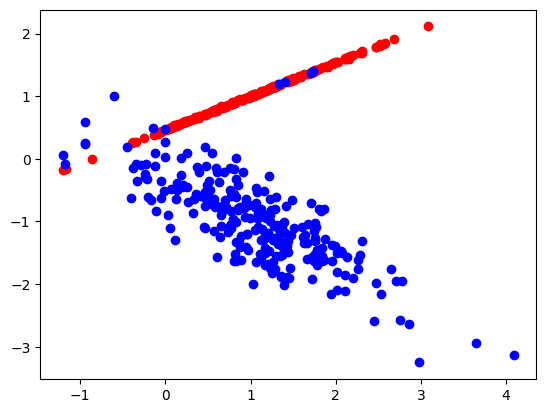

In [16]:
def plot_data(features, labels):
  '''
  The function plots the data on a 2d plane. It colors class -1 with the "blue" color 
  and class +1 with the "red" color.
  '''

  xs = np.array([x[0] for x in features])
  ys = np.array([x[1] for x in features])

  mask_pos = labels > 0
  mask_neg = labels < 0

  xs_pos = xs[mask_pos]
  ys_pos = ys[mask_pos]
  plt.scatter(xs_pos, ys_pos, color = "red")

  xs_neg = xs[mask_neg]
  ys_neg = ys[mask_neg]
  plt.scatter(xs_neg, ys_neg, color = "blue")

  pass


plot_data(features, labels)

### **3. Perceptron**

In this section, we  implement a Perceptron model using numpy. The perceptron aims to classify each sample to a class -1 or class +1 (binary classification task).

**Reminder:** The perceptron model takes an input vector $\mathbf{x}$. If the weighted sum of the inputs, $\mathbf{w}^T\mathbf{x}$ is greater than a threshold $b$ it outputs +1. Otherwise, it outputs a -1:
$$
    f(x)= 
\begin{cases}
    +1,& \text{if } \mathbf{w}^{T}\mathbf{x}\geq b\\
    -1,              & \text{otherwise}
\end{cases}$$

Remember that: $ \mathbf{w}^{T}\mathbf{x} = \sum_{i=1}^{n}{w_ix_i}$.


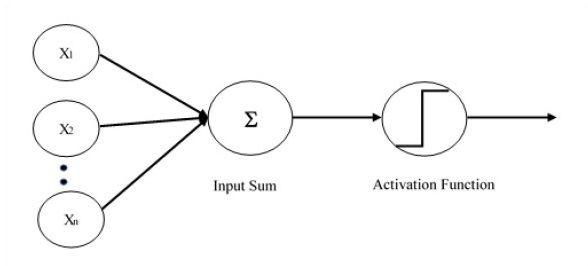

The main goal of the learning algorithm is to find  a vector  $\mathbf{w}$ capable of separating positive samples (y = +1) from negative (y = -1) samples.

To do that, we should learn two things: weights $\mathbf{w}$ and a bias term $b$. 

Instead of updating the bias separately, we can extend the input vector by appending a value of 1. The corresponding weight takes the role of the bias term. For this reason, we only update here the weight vector $\mathbf{w}$

**Learning $\mathbf{w}$:** (You have to write this code)

Start by initializing $\mathbf{w}$ randomly.  
$$
 \mathbf{w}^0 = \mathrm{a \, vector \,\,of \,\,small \,\,random \,\,values}
$$
When the model makes a mistake on a sample $\mathbf{x}_i$, then fix $\mathbf{w}$ using the update rule:

$$\mathbf{w}^{(t+1)} = \begin{cases}
    \mathbf{w}^{(t)},& \text{if   } y_i (\mathbf{w}^{(t)})^T\mathbf{x}_i > 0\\
    \mathbf{w}^{(t)} + \eta y_i \mathbf{x}_i,              & \text{otherwise}
\end{cases}$$

where $\eta$ is the learning rate. $\eta$ controls how much the weights change at each update.  

**Handle the bias term:**
We add a column of ones to the train and test features so we won't need to learn the bias. The train and test shapes will be (#samples,3). There are plenty of ways to do it. One way is using ```np.hstack``` function. 

In [17]:
def add_ones_column(X):
  # add a column of ones to the data
  ones_col = np.ones((X.shape[0],1))
  return np.hstack((ones_col,X))

X_train = add_ones_column(X_train)
X_test = add_ones_column(X_test)

Implement all methods of the Perceptron class below.

In [18]:
np.random.randn(2 + 1)

array([-0.92228689,  0.69943702,  0.56913154])

In [19]:
X_train[1][1:] = np.array([1,2])
X_train[1]

array([1., 1., 2.])

In [21]:
class Perceptron(object):
    def __init__(self, n_features, iterations=10, learning_rate=0.01):
        '''
        The function initialized the Perceptron model.
        n_features - number of features of each sample (excluding the bias)
        iterations - number of iterations on the training data
        learning_rate - learning rate, how much the weight will change during update
        '''
        self.iterations = iterations
        self.learning_rate = learning_rate
        np.random.seed(30) # set random seed, should not be altered!
        self.weights = np.random.randn(n_features + 1)
           
    def predict(self, input):
        '''
        The function makes a prediction for the given input.
        Output: -1 or 1.
        '''
        linear_output = np.dot(input, self.weights)
        y_predicted = np.where(linear_output>=0, 1, -1)
        return y_predicted

    def evaluate(self, inputs, labels):
        '''
        The function makes a predictions for the given inputs and compares 
        against the labels (ground truth). It returns the accuracy.
        Accuracy = #correct_classification / #total
        '''

        classified_data_count = 0
        for xi, target in zip(inputs, labels):
            output = self.predict(xi)
            if(target == output):
                classified_data_count += 1
        total_data_count = len(inputs)
        self.accuracy = classified_data_count/total_data_count
        return self.accuracy


    def train(self, training_inputs, train_labels, test_inputs, test_labels, verbose=True):
        '''
        The function train a perceptron model given training_inputs and train_labels.
        It also evaluates the model on the train set and test set after every iteration.
        '''
        for i in range(self.iterations):
            for x, y in zip(training_inputs, train_labels):
                predicted_value = self.predict(x)
                if (predicted_value - y) != 0:
                  self.weights = self.weights + self.learning_rate * y * x

            if verbose:
              print(f"Iteration No.{i},\
               Train accuracy: {self.evaluate(training_inputs, train_labels)},\
                Test accuracy: {self.evaluate(test_inputs, test_labels)}")

Create a ```Perceptron``` instance and train it on the training data from before. For each iteration, print the train accuracy and test accuracy.  

You can set the hyperparamets to:  
iterations = 10  
learning_rate = 0.01.

In [22]:
# create a Perceptron model and train it.
model = Perceptron(n_features = 2)
model.train(X_train, y_train, X_test, y_test)

Iteration No.0,               Train accuracy: 0.8325,                Test accuracy: 0.82
Iteration No.1,               Train accuracy: 0.9075,                Test accuracy: 0.92
Iteration No.2,               Train accuracy: 0.935,                Test accuracy: 0.97
Iteration No.3,               Train accuracy: 0.95,                Test accuracy: 0.97
Iteration No.4,               Train accuracy: 0.9525,                Test accuracy: 0.98
Iteration No.5,               Train accuracy: 0.9575,                Test accuracy: 0.99
Iteration No.6,               Train accuracy: 0.9625,                Test accuracy: 0.99
Iteration No.7,               Train accuracy: 0.9625,                Test accuracy: 0.99
Iteration No.8,               Train accuracy: 0.9625,                Test accuracy: 0.99
Iteration No.9,               Train accuracy: 0.9575,                Test accuracy: 0.98


### **4. Decision Boundary**

Let's visualize the decision boundary of the trained Perceptron. Use the function below for your plot.

In [23]:
def plot_decision_boundary(features, linear_model):
  '''
  Plots the decision boundary for a given linear model
  Inputs:
  features - numpy array with the data features, its shape should be (100,2)
  linear_model - trained model
  '''
  nb_col = []
  for i in range(X_train.shape[-1]):
    if not (X_train[:,i].min() == 1 and X_train[:,i].max()==1):
      nb_col.append(i)
      
  x_min, x_max = features[:, nb_col[0]].min() - .5, features[:, nb_col[0]].max() + .5
  y_min, y_max = features[:, nb_col[1]].min() - .5, features[:, nb_col[1]].max() + .5
  h = .02
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  inputs = add_ones_column(np.c_[xx.ravel(), yy.ravel()])
  if "sklearn" in str(type(linear_model)):
    Z = linear_model.predict(inputs)
  else:
    Z = []
    for x in inputs:
      Z += [linear_model.predict(x)]
  Z = np.array(Z).reshape(xx.shape)
  plt.contour(xx, yy, Z, colors='k',linestyles=['-'])

Text(0.5, 1.0, 'Test')

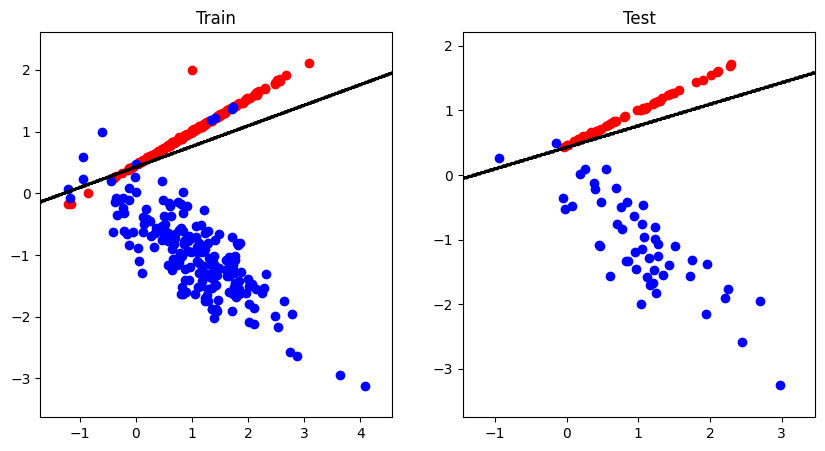

In [24]:
plt.rcParams['figure.figsize'] = 10, 5
plt.subplot(1,2,1)
# plot the training samples here
plot_data(X_train[:, 1:], y_train)
# use "plot_decision_boundary" above to plot the decision boundary of the Perceptron model
plot_decision_boundary(X_train, model)
plt.title("Train")

plt.subplot(1,2,2)
# plot the test samples here
plot_data(X_test[:, 1:], y_test)
# plot_data(X_test[:, 1:])

# use "plot_decision_boundary" above to plot the decision boundary of the Perceptron model
plot_decision_boundary(X_test, model)
plt.title("Test")

### **5. The effect of training-set size**

Let's investigate how the size of the training set affects the train and test accuracy.
We start by training our perceptron model on only 2 train samples, then on 5, 25, 50, 150, 250 and 400 samples.   
We evaluate all models on the test set.

In [25]:
train_samples = [2,5,25,50,150,250,400]

train_acc_ls, test_acc_ls = [], []

for train_size in train_samples:
  # randomly select `train_size` samples
  idx = np.random.choice(len(X_train), size=train_size, replace=False)
  small_X_train, small_y_train = X_train[idx], y_train[idx]
  # create and train a perceptron model
  model = Perceptron(n_features=2, iterations=100, learning_rate=0.01)
  model.train(small_X_train, small_y_train, X_test, y_test, verbose=False)
  # evaluate the model on train and test
  curr_train_acc = model.evaluate(small_X_train, small_y_train)
  curr_test_acc = model.evaluate(X_test, y_test)
  # keep track on it
  train_acc_ls += [curr_train_acc]
  test_acc_ls += [curr_test_acc]

  print(f"Train size: {train_size}, Train accuracy: {curr_train_acc}, Test accuracy: {curr_test_acc}")

Train size: 2, Train accuracy: 1.0, Test accuracy: 0.51
Train size: 5, Train accuracy: 1.0, Test accuracy: 0.8
Train size: 25, Train accuracy: 1.0, Test accuracy: 0.97
Train size: 50, Train accuracy: 1.0, Test accuracy: 0.97
Train size: 150, Train accuracy: 0.9733333333333334, Test accuracy: 0.98
Train size: 250, Train accuracy: 0.968, Test accuracy: 0.98
Train size: 400, Train accuracy: 0.965, Test accuracy: 0.98


Text(0, 0.5, 'Accuracy')

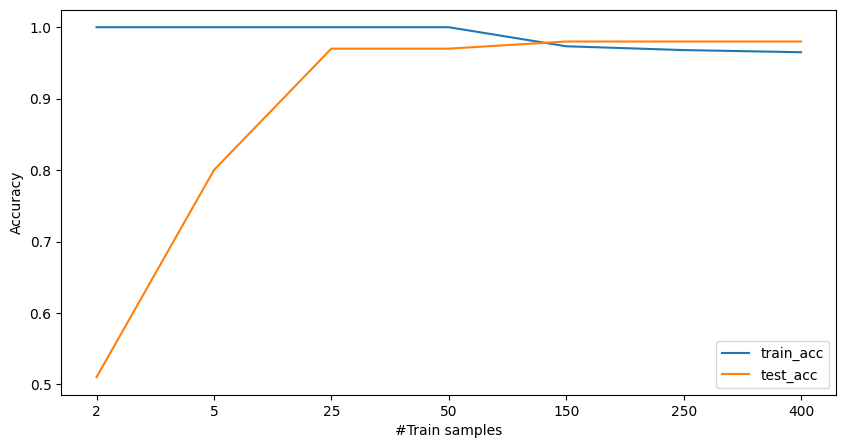

In [26]:
# plot train and test accuracy as a function of train size
train_samples = ["2","5","25","50","150","250","400"]
plt.plot(train_samples, train_acc_ls)
plt.plot(train_samples, test_acc_ls)
plt.legend(["train_acc","test_acc"])
plt.xlabel("#Train samples")
plt.ylabel("Accuracy")



we can learn from the plot above that when we increase our trainning data the accuracy of the model on new data gets better, in particular ar least 25 samples is important.

the effect that occurs when we train a model on a very small train set is bias varience which means that at the begining we have baised model and wen we increase the data the bias decreases and the variance of the model increases

very small training sets will result very low test accuracy since very small training set will lead to a baised model

### **6. Regularization**

We wish to improve the test accuracy when training with little data. As discussed in class, overfitting can be reduced by adding a regularization term to the loss:

$$\hat{E}(w) = \sum_{i}{\mathrm{loss}_\mathbf{w}(h(x),y)} + \frac{\lambda}{2}||\mathbf{w}||^2$$

where $\lambda$ is the regularization coefficient (hyper parameter) and $||\mathbf{w}||^2$ is a L2 regularization.  
Reminder: $||\mathbf{w}||^2 = \sum_{i=1}^{k}{w_i^2}$

**Q**: What will be the new update rule when the loss includes regularization?  
Copy an image or write in [$latex$](https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb)

 <font color='red'>

</font>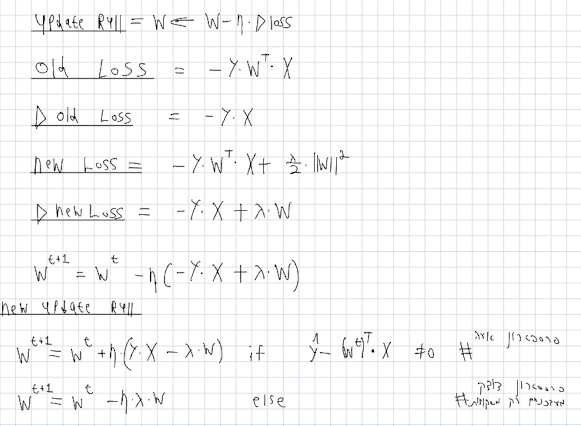



Implement the Perceptron algorithm again but with regularization. All functions should be the same from the previous section except the ``train`` function.  
**Important: Don't regularize the bias term ($\mathbf{w}_0$).**

In [27]:
class RegularizedPerceptron(object):
    def __init__(self, n_features, lambda_value, iterations=10, learning_rate=0.01):
        '''
        The function initialized the Perceptron model.
        n_features - number of inputs to the perceptron (excluding the bias)
        iterations - number of iterations on the training data
        learning_rate - learning rate, how much the weight will change during update
        '''
        self.iterations = iterations
        self.learning_rate = learning_rate
        np.random.seed(30) # set random seed, should not be altered!
        self.weights = np.random.randn(n_features + 1)
        self.lambda_value = lambda_value
           
    def predict(self, inputs):
        '''
        The function makes a prediction for the given inputs.
        Output: -1 or 1.
        '''
        linear_output = np.dot(inputs, self.weights)
        y_predicted = np.where(linear_output>=0, 1, -1)
        return y_predicted

    def evaluate(self, inputs, labels):
        '''
        The function makes a predictions for the given inputs and compares 
        against the labels (ground truth). It returns the accuracy.
        Accuracy = #correct_classification / #total
        '''
        classified_data_count = 0
        for xi, target in zip(inputs, labels):
            output = self.predict(xi)
            if(target == output):
                classified_data_count += 1
        total_data_count = len(inputs)
        self.accuracy = classified_data_count/total_data_count
        return self.accuracy

    def train(self, training_inputs, train_labels, test_inputs, test_labels, verbose=True):
        '''
        The function train a perceptron model given training_inputs and train_labels.
        It also evaluates the model on the train set and test set after every iteration.
        '''
        for i in range(self.iterations):
            for inputs, label in zip(training_inputs, train_labels):
              predicted_value = self.predict(inputs)
              reg = - self.learning_rate * self.lambda_value * self.weights
            
              if (predicted_value - label) != 0:
                self.weights = self.weights + self.learning_rate * label * inputs 
                self.weights[1:] += reg[1:]

              else:
                self.weights[1:] += reg[1:]

            if verbose:
              print(f"Iteration No.{i},\
               Train accuracy: {self.evaluate(training_inputs, train_labels)},\
                Test accuracy: {self.evaluate(test_inputs, test_labels)}")
            

Let's compare ```RegularizedPerceptron``` against our regular ```Perceptron``` on a trainset with 5 samples.

In [28]:
# set lambda value
lambda_value = 0.4

In [29]:
train_size = 5

# randomly select `train_size` samples
idx = np.random.choice(len(X_train), size=train_size, replace=False)
small_X_train, small_y_train = X_train[idx], y_train[idx]

# create and train a perceptron model
perceptron = Perceptron(n_features=2, iterations=100, learning_rate=0.01)
perceptron.train(small_X_train, small_y_train, X_test, y_test, verbose=False)

# evaluate the model on train and te
print(f"Perceptron: Train Acc: {perceptron.evaluate(small_X_train, small_y_train)},\
 Test Acc: {perceptron.evaluate(X_test, y_test)}")


# create and train a regularized perceptron model
reg_perceptron = RegularizedPerceptron(n_features=2, lambda_value = lambda_value,
                                       iterations=100, learning_rate=0.01)
reg_perceptron.train(small_X_train, small_y_train, X_test, y_test, verbose=False)

# evaluate the model on train and test
print(f"RegularizedPerceptron: Train Acc: {reg_perceptron.evaluate(small_X_train, small_y_train)},\
 Test Acc: {reg_perceptron.evaluate(X_test, y_test)}")


Perceptron: Train Acc: 1.0, Test Acc: 0.8
RegularizedPerceptron: Train Acc: 1.0, Test Acc: 0.81


We arbitrarily chose $\lambda = 0.4$ and increased the test accuracy by 1%. We can probably do better.    
Do a hyperparameter search (over 10 possible values) to find a lambda value that gives the best test accuracy.  
(Note: Usually, hyperparameter search is done on a validation set, since the data is small we do it here on the test set).

In [30]:
# find best lambda value
# For lambda_value in [...]: train and evaluate RegularizedPerceptron.
# Find model with highest accuracy
lambds = np.linspace(15,24, 10)
acc_l = []

for l in lambds:
  reg_perceptron = RegularizedPerceptron(n_features=2, lambda_value = l,
                                       iterations=100, learning_rate=0.01)
  reg_perceptron.train(small_X_train, small_y_train, X_test, y_test, verbose=False)
  print(f"lambda: {l}, Test Acc: {reg_perceptron.evaluate(X_test, y_test)},  Train Acc: {reg_perceptron.evaluate(X_train, y_train)}")
  acc_l.append(reg_perceptron.evaluate(X_test, y_test))



lambda: 15.0, Test Acc: 0.87,  Train Acc: 0.8875
lambda: 16.0, Test Acc: 0.49,  Train Acc: 0.5
lambda: 17.0, Test Acc: 0.5,  Train Acc: 0.5
lambda: 18.0, Test Acc: 0.98,  Train Acc: 0.97
lambda: 19.0, Test Acc: 0.5,  Train Acc: 0.5025
lambda: 20.0, Test Acc: 0.83,  Train Acc: 0.8225
lambda: 21.0, Test Acc: 0.98,  Train Acc: 0.9525
lambda: 22.0, Test Acc: 0.94,  Train Acc: 0.9225
lambda: 23.0, Test Acc: 0.91,  Train Acc: 0.8825
lambda: 24.0, Test Acc: 0.87,  Train Acc: 0.835
